In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

#Load Data, Poke Around at it

In [119]:
complaints = pd.read_csv("Consumer_Complaints.csv", low_memory=False, 
                         parse_dates=["Date received", "Date sent to company"])

In [120]:
complaints.head(3)

Complaint ID          Product                       Sub-product  \
0       1382851  Debt collection  Other (phone, health club, etc.)   
1       1383126  Debt collection  Other (phone, health club, etc.)   
2       1383251  Debt collection  Other (phone, health club, etc.)   

                                Issue                             Sub-issue  \
0  False statements or representation     Attempted to collect wrong amount   
1     Disclosure verification of debt  Right to dispute notice not received   
2     Disclosure verification of debt  Right to dispute notice not received   

  State  ZIP code Submitted via Date received Date sent to company  \
0    IN     46403           Web    2015-05-19           2015-05-19   
1    GA     30096           Web    2015-05-19           2015-05-19   
2    WA     98055           Web    2015-05-19           2015-05-19   

                         Company         Company response Timely response?  \
0  Diversified Consultants, Inc.  Closed with explanation              Yes   
1          Stellar Recovery Inc.  Closed with explanation              Yes   
2          Stellar Recovery Inc.  Closed with explanation              Yes   

  Consumer disputed?  
0                NaN  
1                NaN  
2                NaN

In [121]:
complaints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393491 entries, 0 to 393490
Data columns (total 14 columns):
Complaint ID            393491 non-null int64
Product                 393491 non-null object
Sub-product             270285 non-null object
Issue                   393485 non-null object
Sub-issue               121948 non-null object
State                   387998 non-null object
ZIP code                389029 non-null float64
Submitted via           393491 non-null object
Date received           393491 non-null datetime64[ns]
Date sent to company    393491 non-null datetime64[ns]
Company                 393491 non-null object
Company response        393491 non-null object
Timely response?        393491 non-null object
Consumer disputed?      361320 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(10)
memory usage: 45.0+ MB


In [122]:
complaints.columns

Index(['Complaint ID', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'State',
       'ZIP code', 'Submitted via', 'Date received', 'Date sent to company',
       'Company', 'Company response', 'Timely response?',
       'Consumer disputed?'],
      dtype='object')

In [123]:
print(complaints["Product"][0])
print(type(complaints["Product"][0]))
print(complaints["Date received"].head(2))
print(complaints["Date received"][0])
print(type(complaints["Date received"][0]))

Debt collection
<class 'str'>
0   2015-05-19
1   2015-05-19
Name: Date received, dtype: datetime64[ns]
2015-05-19 00:00:00
<class 'pandas.tslib.Timestamp'>


#Complaints by Month

In [124]:
complaints.index = pd.to_datetime(complaints["Date received"])

In [125]:
complaints.Product.head(3)

Date received
2015-05-19    Debt collection
2015-05-19    Debt collection
2015-05-19    Debt collection
Name: Product, dtype: object

In [126]:
by_month = complaints.Product.resample("M", how=["count"])

In [127]:
by_month.head()

count
Date received       
2011-12-31      2556
2012-01-31      3266
2012-02-29      3507
2012-03-31      6247
2012-04-30      5725

In [128]:
by_month.ix[-1]

count    3586
Name: 2015-05-31 00:00:00, dtype: int64

In [129]:
by_month = by_month.drop(by_month.index[-1])

In [130]:
by_month.tail(3)

count
Date received       
2015-02-28     12709
2015-03-31     14558
2015-04-30     13442

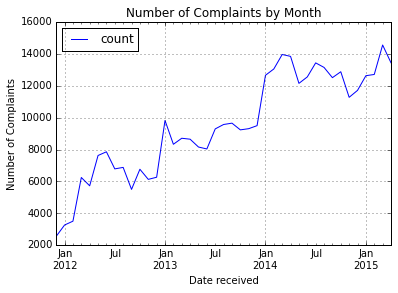

In [131]:
by_month.plot()
plt.title("Number of Complaints by Month")
plt.ylabel("Number of Complaints")
plt.show()

After some searching around online, this fast growth in recent years looks consistent with reality. The bureau was created not long before the start of this graph. It stands to reason that its role has not fully matured and that it will experience rapid growth in reports until it does.

#Number of Complaints by Product

In [132]:
complaints.index = complaints["Product"] # did not pop the date received, so table does not need to be reloaded

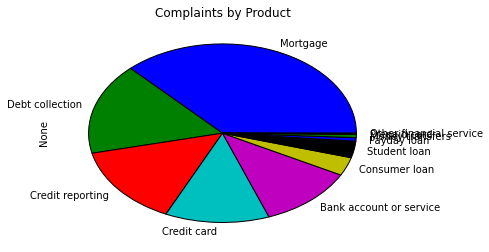

In [133]:
complaints["Product"].value_counts().plot(kind="pie")
plt.title("Complaints by Product")
plt.show()

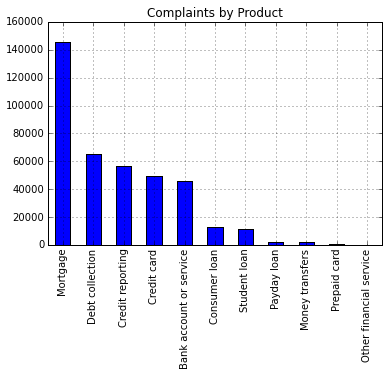

In [134]:
complaints["Product"].value_counts().plot(kind="bar")
plt.title("Complaints by Product")
plt.show()

This info is also consistent with the news on the subject. Mortages, debt collection, and credit reporting contain an obvious conflict of interest between the consumer and the company involved. Many people have problems with mortagage affordibility and complain because of a refusal to restructure the debt or poor terms that are offered. Considering the large number of people obliged to a mortage also clearly contributes to the numbers.

#Number by Company

In [135]:
complaints["Company"].value_counts().ix[1:10]

Wells Fargo            32860
JPMorgan Chase         26088
Experian               20027
Citibank               19494
Equifax                19427
Ocwen                  16782
TransUnion             15219
Capital One            12009
Nationstar Mortgage     9660
dtype: int64

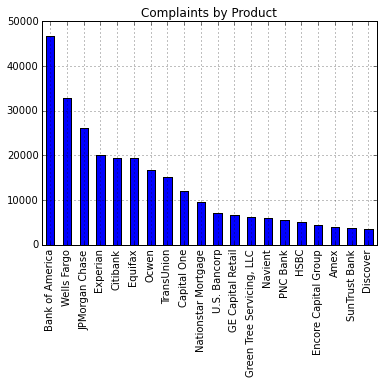

In [136]:
complaints["Company"].value_counts()[:20].plot(kind="bar")
plt.title("Complaints by Product")
plt.show()

This is also not very surprising. Some of the largest and most well-known banks come first, clearly because of the large number of customers they have. Some credit reporting agencies are thrown in there as well, notably Experian and Equifax. The subsequent companies seem to go into a wider variety of products.

#Number by Company Response

In [137]:
complaints["Company response"].value_counts()

Closed with explanation            277554
Closed with non-monetary relief     50213
Closed with monetary relief         28024
Closed without relief               17909
Closed                               9551
Closed with relief                   5305
In progress                          3107
Untimely response                    1828
dtype: int64

Note that this only has 8 categories. It is also important to consult the original counts, and this has fully 393491 entries. That means that every entry had this field filled, and it is very clean data. It seems certain that the bureau forces this response to be one of a small list of pre-selected options.

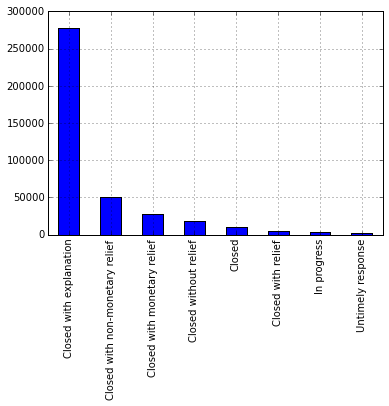

In [138]:
complaints["Company response"].value_counts().plot("bar")
plt.show()

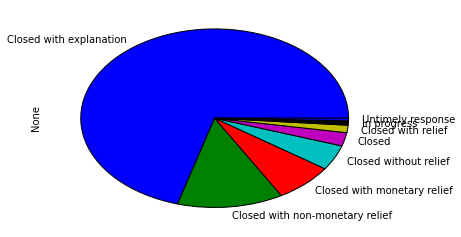

In [139]:
complaints["Company response"].value_counts().plot("pie")
plt.show()

#By Day of Week

In [140]:
complaints.index = pd.to_datetime(complaints["Date received"])

In [141]:
dow = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

In [142]:
complaints["day_of_week"] = complaints.index.to_series().map(lambda d: d.weekday())

In [143]:
print(complaints["day_of_week"].ix[:2]) # seems to be working
print(complaints["day_of_week"].ix[-2:])

Date received
2015-05-19    1
2015-05-19    1
Name: day_of_week, dtype: int64
Date received
2011-12-01    3
2011-12-01    3
Name: day_of_week, dtype: int64


In [144]:
complaints["day_of_week"].value_counts().sort_index() # seems like a reasonable list

0    71313
1    74170
2    76118
3    72707
4    63863
5    19109
6    16211
dtype: int64

In [145]:
weekday_plot = complaints["day_of_week"].value_counts().sort_index()

In [146]:
weekday_plot.index = dow

In [147]:
print(weekday_plot)

Sunday       71313
Monday       74170
Tuesday      76118
Wednesday    72707
Thursday     63863
Friday       19109
Saturday     16211
dtype: int64


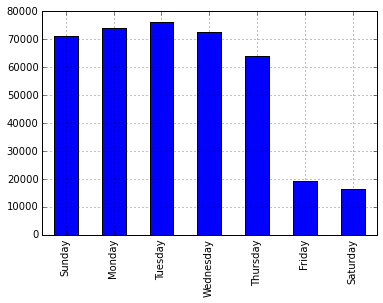

In [148]:
weekday_plot.plot("bar")
plt.show()

People apparently seem to log fewer complaints on the weekend. This seems like a reasonable conclusion. It might be because they interact with the finance companies more often during the weekdays in the first place. The reporting system seems to be online, so this is the best explination I have. People still might assume that their claim will be processed faster during the weekday, or a host of other possible reasons.

In [149]:
with open("State_population.csv") as file:
    for i in range(5):
        print(file.readline())

table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),,,,,,

"Table 1. Annual Estimates of the Population for the United States, Regions, States, and Puerto Rico: April 1, 2010 to July 1, 2013",,,,,,

Geographic Area,"April 1, 2010",,Population Estimate (as of July 1),,,

,Census,Estimates Base,2010,2011,2012,2013

United States,"308,745,538","308,747,716","309,326,295","311,582,564","313,873,685","316,128,839"



In [150]:
pop = pd.read_csv("State_population.csv", header=3, skipfooter=7, engine="python")

In [151]:
pop.ix[:4]

Unnamed: 0       Census Estimates Base         2010         2011  \
0  United States  308,745,538    308,747,716  309,326,295  311,582,564   
1      Northeast   55,317,240     55,317,261   55,376,322   55,598,499   
2        Midwest   66,927,001     66,927,549   66,976,321   67,146,663   
3          South  114,555,744    114,557,273  114,857,899  116,032,322   
4           West   71,945,553     71,945,633   72,115,753   72,805,080   

          2012         2013  
0  313,873,685  316,128,839  
1   55,771,792   55,943,073  
2   67,321,425   67,547,890  
3  117,253,992  118,383,453  
4   73,526,476   74,254,423

In [152]:
pop.columns

Index(['Unnamed: 0', 'Census', 'Estimates Base', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [153]:
pop.columns = ["State", "Census", "Base", 2010, 2011, 2012, 2013]

In [154]:
pop.columns

Index(['State', 'Census', 'Base', 2010, 2011, 2012, 2013], dtype='object')

In [155]:
pop.index = pop["State"]

In [156]:
pop.tail()

State     Census       Base       2010       2011  \
State                                                                        
.Virginia            .Virginia  8,001,024  8,001,031  8,024,417  8,105,850   
.Washington        .Washington  6,724,540  6,724,543  6,742,256  6,821,481   
.West Virginia  .West Virginia  1,852,994  1,852,999  1,854,146  1,855,184   
.Wisconsin          .Wisconsin  5,686,986  5,686,983  5,689,060  5,708,785   
.Wyoming              .Wyoming    563,626    563,626    564,222    567,329   

                     2012       2013  
State                                 
.Virginia       8,186,628  8,260,405  
.Washington     6,895,318  6,971,406  
.West Virginia  1,856,680  1,854,304  
.Wisconsin      5,724,554  5,742,713  
.Wyoming          576,626    582,658

In [157]:
pop.index[8]

'.Arkansas'

In [158]:
int(pop[2013]['.Arkansas'].replace(",",""))

2959373

In [159]:
names = pd.read_csv("State_abrv.tsv", sep="\t")

In [160]:
names.head()

State  junk1  junk2 code
0     Alabama  State  US-AL   AL
1      Alaska  State  US-AK   AK
2     Arizona  State  US-AZ   AZ
3    Arkansas  State  US-AR   AR
4  California  State  US-CA   CA

In [161]:
for i in range(50):
    s = names["State"][i]
    c = names["code"][i]
    print("."+s+str(int(pop[2013]["."+s].replace(",","")))+" ", end="")

.Alabama4833722 .Alaska735132 .Arizona6626624 .Arkansas2959373 .California38332521 .Colorado5268367 .Connecticut3596080 .Delaware925749 .District of Columbia646449 .Florida19552860 .Georgia9992167 .Hawaii1404054 .Idaho1612136 .Illinois12882135 .Indiana6570902 .Iowa3090416 .Kansas2893957 .Kentucky4395295 .Louisiana4625470 .Maine1328302 .Maryland5928814 .Massachusetts6692824 .Michigan9895622 .Minnesota5420380 .Mississippi2991207 .Missouri6044171 .Montana1015165 .Nebraska1868516 .Nevada2790136 .New Hampshire1323459 .New Jersey8899339 .New Mexico2085287 .New York19651127 .North Carolina9848060 .North Dakota723393 .Ohio11570808 .Oklahoma3850568 .Oregon3930065 .Pennsylvania12773801 .Rhode Island1051511 .South Carolina4774839 .South Dakota844877 .Tennessee6495978 .Texas26448193 .Utah2900872 .Vermont626630 .Virginia8260405 .Washington6971406 .West Virginia1854304 .Wisconsin5742713 

In [163]:
complaints["State"].head()

Date received
2015-05-19    IN
2015-05-19    GA
2015-05-19    WA
2015-05-19    IA
2015-05-19    FL
Name: State, dtype: object

In [164]:
complaints.index = complaints["State"]